# Analysing Funding in the Indian Startup Ecosystem

## Business Understanding
**Objective:** The primary objective is to venture into the Indian start-up ecosystem. This involves understanding the landscape of start-ups in India, their funding patterns, and the key players in the ecosystem (both start-ups and investors).

**Problem Definition:** The problem can be defined as analyzing the funding received by Indian start-ups from 2018 to 2021. This involves understanding the trends in funding, identifying the sectors or industries that are attracting the most investment, and recognizing the major investors in the ecosystem.

**Data Understanding:** The data that will be used for this analysis includes details of the start-ups, the funding amounts they received, and information about the investors. This data will be provided separately for each year from 2018 to 2021 via three different sources.

**Plan:** The preliminary plan would involve cleaning and preprocessing the data, conducting exploratory data analysis to understand trends and patterns, and possibly building predictive models to forecast future trends in the start-up ecosystem.

**Success Criteria:** The success of this project could be measured by the team’s ability to gain insights that help in making informed decisions about venturing into the Indian start-up ecosystem. This could involve identifying promising sectors, understanding the competitive landscape, and recognizing potential investment opportunities.

## Data Understanding


### Setup:

### Importation
Here is the section to import all the packages/libraries that will be used through the notebook

In [ ]:
# Import all the necessary packages

import pyodbc     
from dotenv import dotenv_values   
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings('ignore')

### Data Loading
Here is the section to load the dataset

In [ ]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'

# Use pandas to load the csv file
data_2018 = pd.read_csv(url)

In [ ]:
# Display head
data_2018.head()

In [ ]:
# Add year column
Year = 2018
data_2018['Year'] = Year

In [ ]:
data_2018.info()

In [ ]:
data_2018.shape

In [ ]:
# Load from OneDrive source

# Use pandas to load the csv file
data_2019 = pd.read_csv('Dataset\startup_funding2019.csv')

# Display head
data_2019.head() 

In [ ]:
# Add year column

Year = 2019
data_2019['Year'] = Year

In [ ]:
data_2019.shape

In [ ]:
data_2019.info()

In [ ]:
# Load from SQL Database source

# Load environment variables from .env file into a dictionary
environment_variables  = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [ ]:

# Your connection string
connection_string = f"Driver={{SQL Server}}; SERVER={server}; DATABASE={database}; UID={username}; PWD={password}"

# Create a new connection
connection = pyodbc.connect(connection_string)

# Now you can use `connection` to interact with your database


In [ ]:
# Create a connection string

connection_string = f"Driver={{SQL Server}}; SERVER={server}; DATABASE={database}; UID={username}; PWD={password}"

In [ ]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [ ]:
# SQL query to extract the data from Table1 
query_2020 = "SELECT * from dbo.LP1_startup_funding2020"
 
 # Execute the SQL query to load data from Table1 into pandas Dataframe
data_2020= pd.read_sql(query_2020, connection)

 # SQL query to extract the data from Table2
query_2021 = "SELECT * from dbo.LP1_startup_funding2021"

 # Execute the SQL query to load data from Table2 into pandas Dataframe
data_2021 = pd.read_sql(query_2021, connection)

In [ ]:
data_2020.head()

In [ ]:
# Add year column

Year = 2020
data_2020['Year'] = Year

In [ ]:
data_2020.shape

In [ ]:
data_2020.info()

In [ ]:
data_2021.head()

In [ ]:
# Add year column
Year = 2021
data_2021['Year'] = Year

In [ ]:
data_2021.shape

In [ ]:
data_2021.info()

### Action Plan
- Understand the Dataset: Familiarize yourself with the dataset. Understand what each column represents, the data types of each column, and how the data is structured.
- Define the Objective: Clearly define what you want to achieve from the analysis of the dataset. This will help you identify which data is relevant.
- Identify the Issues: Look for common data issues such as missing values, inconsistent data types, outliers, duplicate rows, inaccurate data, and irrelevant data. This can be done by visual inspection or by using functions that summarize the dataset.
- Plan Your Cleaning Process: Based on the issues identified, plan how to clean the data. This could involve deciding on how to handle missing data, whether to remove outliers, how to deal with duplicate or irrelevant data, etc.
- Backup the Dataset: Always make a copy of the original dataset before cleaning. 


### Hypothesis Test

***Null Hypothesis (H0):*** There is no difference in the amount of funding received by start-ups across different sectors.

***Alternative Hypothesis (H1):*** There is a difference in the amount of funding received by start-ups across different sectors.





### Questions

1 - How has the funding trend for Indian start-ups changed from 2018 to 2021? 

2 - Which sectors or industries received the most funding? 

3 - Who are the major investors in the Indian start-up ecosystem?

4 - Are there any specific cities in India that are attracting more start-ups than the others?

5 - Which cities in India have attracted the most funding?

6 - Which start-ups have shown the most growth in terms of funding received over the years?

## Data Preprocessing

In [ ]:
# We are renaming the columns in the dataframe 'data_2018'
data_2018.rename(
    columns={
        'Company Name': 'Company_Brand',  # Changing 'Company Name' to 'Company_Brand'
        'Industry': 'Sector',  # Changing 'Industry' to 'Sector'
        'Round/Series': 'Stage',  # Changing 'Round/Series' to 'Stage'
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
        'Location': 'HeadQuarter',  # Changing 'Location' to 'HeadQuarter'
        'About Company': 'What_it_does'  # Changing 'About Company' to 'What_it_does'
        # Add more column changes as needed
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [ ]:
# We are renaming the columns in the dataframe 'data_2019'
data_2019.rename(
    columns={
        'Company/Brand': 'Company_Brand',  # Changing 'Company Name' to 'Company_Brand'
        'What it does': 'What_it_does'  # Changing 'About Company' to 'What_it_does'
        # Add more column changes as needed
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [ ]:
# We are renaming the columns in the dataframe 'data_2020'
data_2020.rename(
    columns={
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [ ]:
# We are renaming the columns in the dataframe 'data_2021'
data_2021.rename(
    columns={
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [ ]:
data_2018.head()

In [ ]:
data_2019.head()

In [ ]:
data_2020.head()

In [ ]:
data_2021.head()

In [ ]:
# Concatenate data into a single Dataframe

concatenated_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)

In [ ]:
concatenated_data.to_csv("Indian_start-ups.csv")

In [ ]:
df = pd.read_csv("Indian_start-ups.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Display the full summary of the dataset
df.info()

In [ ]:
# Check column names
df.columns

In [ ]:
# Check Null Values
df.isnull().any()

In [ ]:
df.isnull().sum()

In [ ]:
# Check for duplicated values
df.duplicated().sum()

# Data Cleaning

Remove '#REF!' in random column values from concatenated data


In [ ]:
# Function to remove '#REF!' from all columns
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', "")
    return value

# Apply the function to all columns
df = df.applymap(remove_ref) # element-wise


Replace 'None' string values with NaN element-wise allowing for consistent
representation of missing values

In [ ]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value. lower() == 'nan'):
        value = np.nan

    return value

# Apply the function to all columns
df = df.applymap(replace_none) # element-wise

If a value in stage column is a website link, its correct value is NaN

Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChlHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593

In [ ]:
# display duplicates
df.duplicated()

In [ ]:
# Drop duplicates
df = df.drop_duplicates()
df.head()

Decision to drop column10 was due to the column having only two(2) non-null values and a couple of repeated values from the Stage column

In [ ]:
df = df.drop(columns=['column10', 'Unnamed: 0.1', 'Unnamed: 0'])


In [ ]:
# Disply head 
df.head()

### Clean Company Brand column

In [ ]:
df['Company_Brand']

In [ ]:
# Remove leading and trailing characters and replace text with some other text
df['Company_Brand'] = df['Company_Brand'].str.strip()
df['Company_Brand'] = df['Company_Brand'].str.replace('[^\w\s]','')
df['Company_Brand'] = df['Company_Brand'].str.replace('\s+', ' ')


In [ ]:
df

### Clean Sector column

In [ ]:
# Remove leading and trailing characters and replace text with some other text
df['Sector'] = df['Sector'].str.strip()
df['Sector'] = df['Sector'].str.replace('[^\w\s]','')
df['Sector'] = df['Sector'].str.replace('\s+', ' ')


In [ ]:
# Replaces any missing values in the 'Sector' column with 'Unknown'
df['Sector'] = df['Sector'].fillna('Others')


In [ ]:
# This code returns all unique values in the 'Sector' column.
df['Sector'].unique()


In [ ]:
# This code standardizes sector names in a DataFrame based on certain keywords.
import re

def standardize_sectors(sector):
    if re.search('finance|banking|insurance|fintech|Financial Services|Financial Technology|Mobile Payments', sector, re.IGNORECASE):
        return 'Finance'
    elif re.search('agriculture|farming|fish|milk|diary|dairy|dairy startup', sector, re.IGNORECASE):
        return 'Agriculture'
    elif re.search('education|edtech|E-commerce', sector, re.IGNORECASE):
        return 'Education'
    elif re.search('Healthcare Services|Hospital|Medical|Pharmaceutical|Nutrition|Diagnostics|Fitness|Public Safety|Health Tech|Wellness', sector, re.IGNORECASE):
        return 'Healthcare'
    elif re.search('Home|Decor|Interior Design|Interior|Smart Home|Renovation', sector, re.IGNORECASE):
        return 'RealEstate'
    elif re.search('Retail|E-commerce', sector, re.IGNORECASE):
        return 'Retail'
    elif re.search('Aviation|Aerospace', sector, re.IGNORECASE):
        return 'Aviation'
    elif re.search('Energy|Renewable Energy|Clean Energy|Solar|', sector, re.IGNORECASE):
        return 'Energy'
    elif re.search('Internet|Information|Messaging|Personalization|Test and Measurement|Technology|CleanTech|Mobile|Apps|Developer|Cloud|Artififial|PaaS|SaaS', sector, re.IGNORECASE):
        return 'IT'
    elif re.search('Marketing|Promotion|Event|Market', sector, re.IGNORECASE):
        return 'Marketing'
    elif re.search('Consumer|Food|Beverage|Tea|Snack', sector, re.IGNORECASE):
        return 'Consumables'
    elif re.search('Media and Entertainment|News|Outdoors|Sports|Product studio|Broadcasting|Media and Entertainment|Music|Music Streaming|Video|Video Streaming', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search("Men's|Shoes|Fashion|Laundry and Dry-cleaning", sector, re.IGNORECASE):
        return 'Lifestyle'
    elif re.search('Coworking|Incubators|Recruiting|Staffing|Consulting', sector, re.IGNORECASE):
        return 'HR'
    elif re.search('Automotive|Auto|Engine|Automotion', sector, re.IGNORECASE):
        return 'Automotive'
    elif re.search('Logistics|Transportation|Travel|Freight|Supply Chain', sector, re.IGNORECASE):
        return 'Logistics'
    elif re.search('Others', sector, re.IGNORECASE):
        return 'Others'
    # Add more conditions here to handle other sectors
    else:
        return sector  # If no conditions match, return the original sector

# Apply the function to the Sector column
df['Sector'] = df['Sector'].apply(standardize_sectors)


In [ ]:
# Display the updated DataFrame
df[df['Sector'] .isnull()]

### Clean stage column

In [ ]:
df['Stage'].unique()

If a value in stage column is a website link, its correct value is NaN

Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChlHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593

In [ ]:
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'

    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [ ]:
# Remove website link values from the stage column
df['Stage'] = df['Stage'].apply(remove_website_link)


If the 'stage' value is a number or contains $, the column 'what_it does' becomes its
old value concatenated with the value in the 'founder' column. The correct value for
'founder' is the 'investor' value and the correct value for 'investor' is the 'amount'
value and correct 'amount' becomes the old 'stage' value while the correct value for
'stage' is NaN or missing.

In [ ]:
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Identify rows where 'Stage' value is numeric
mask = df['Stage'].apply(is_numeric)

# Update the 'What_it_does' column to its concatenation with 'Founders' value
old_What_it_does = df.loc[mask, 'What_it_does']
old_Founders = df.loc[mask, 'Founders']

df.loc[mask, 'What_it_does'] = old_What_it_does.fillna('') + ' ' + old_Founders.fillna('')

# Update 'Founders' column using the old 'Investor' value
df.loc[mask, 'Founders'] = df.loc[mask, 'Investor']

# Update 'Investor' column using the old 'Amount($)' value
df.loc[mask, 'Investor'] = df.loc[mask, 'Amount($)']

# Update 'Amount($)' column using the old 'Stage' value
df.loc[mask, 'Amount($)'] = df.loc[mask, 'Stage']

# Set 'Stage' to NaN
df.loc[mask, 'Stage'] = np.nan


In [ ]:
# Replaces any missing values in the 'Stage' column with 'Unknown'
df['Stage'] = df['Stage'].fillna('Unknown')

In [ ]:
# Display rows where the 'Stage' column contains NaN values
df[pd.isna(df['Stage'])]

In [ ]:
df

### Clean Amount column

In [ ]:
df['Amount($)'].unique()

In [ ]:
df['Amount($)'].nunique()

Convert rupees to dollars with the average exchange rate for 2018

In [ ]:

# Function to convert a string to float
def floater(string):
    try:
        return float(string)
    except ValueError:
        return np.nan

# Function to clean amount values
def clean_amount(amount):
    if isinstance(amount, str):
        # Remove any spaces
        amount = amount.replace(' ', '')
        # Remove commas
        amount = amount.replace(',', '')

        if amount == '' or amount == '-':
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of 1 INR = 0.01461 USD
        elif '₹' in amount:
            amount = amount.replace('₹', '' )
            amount = floater(amount) * 0.01461
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    return amount


If the investor value is a number or contains $, the correct value for amount if missing
is the investor value, the correct value for stage is the old amount value and the
investor value becomes NaN or missing


In [ ]:
# Identify rows where 'investor' value is numeric using clean_amount function
mask = df['Investor'].apply(lambda x: pd.notna(clean_amount(x)))

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = df['Stage'].isna()
df.loc[mask & stage_mask, 'Stage'] = df.loc[mask, 'Amount($)']

# Update 'amount' column with 'investor' value
df.loc[mask, 'Amount($)'] = df.loc[mask, 'Investor']

# Set 'investor' to NaN
df.loc[mask, 'Investor'] = np.nan


Clean and convert amounts to USD 



In [ ]:
# Clean and convert amounts to USD
df['Amount($)'] = [clean_amount(amount) for amount in df['Amount($)']]


Replace falsely unique values or actual duplicates in categorical and string columns
with their first occurence in the final_dataset

In [ ]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_col_duplicates(column):
    """ 
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence
        Although the first occurrence might not be the best representation but it allows for consistency in values
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns : column with consistent representation of values

    """
    actual_strings = {} # Dictionary to store the first occurrence of each modified string

    def replace_string(string):
        actual_string = re.sub(r'[^\w]', '', string).lower() if isinstance(string, str) else string # Replace all special characters including whitespaces
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)

In [ ]:
# Ensure the 'Amount' column is of type string
df['Amount($)'] = df['Amount($)'].astype(str)

df['Amount($)'] = df['Amount($)'].astype(float)

# Add a dollar sign to the start of each value in the 'Amount' column
df['Amount($)'] = df['Amount($)'].apply(lambda x: f"${x}")


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df['Amount($)'] = df['Amount($)'].str.replace('$', '')
df['Amount($)'] = df['Amount($)'].str.replace(',', '')
df['Amount($)'] = df['Amount($)'].astype(float)


In [ ]:
df[pd.isna(df['Amount($)'])]

In [ ]:

# df['Amount($)'] = df['Amount($)'].replace('—', np.nan)
# df['Amount($)'] = df['Amount($)'].str.replace('$', '')
# df['Amount($)'] = df['Amount($)'].str.replace('₹', '')
# df['Amount($)'] = df['Amount($)'].str.replace(',', '')
# df = df[df['Amount($)'] != 'Upsparks']

# #df['Amount($)'] = df['Amount($)'].replace('Undisclosed', np.nan)
# #df['Amount($)'] = pd.to_numeric(df['Amount($)'])


In [ ]:
# df_upsparks = df[df['Amount($)'] == 'Undisclosed']
# df_upsparks

In [ ]:
df


### Clean the HeadQuarter column 

In [ ]:
df[["City", "Region", "Country"]]= df["HeadQuarter"].str.split(",", expand=True)

In [ ]:
df.tail()

In [ ]:
df = df.drop(columns=['Region', 'Country'])


In [ ]:
def move_column(df, col, pos):
    col_series = df[col]
    df.drop(columns=[col], inplace=True)
    df.insert(loc=pos, column=col, value=col_series)

move_column(df, 'City', 4)  # Moves 'my_column' to the first position


In [ ]:
df.columns

In [ ]:
df[pd.isna(df['HeadQuarter'])]

### Clean Year column

In [ ]:
# This line of code returns all unique values in the 'Year' column of the dataframe 'df'
df['Year'].unique()


### Clean Founded column

In [ ]:
# This line of code returns all unique values in the 'Founded' column of the dataframe 'df'
df['Founded'].unique()


In [ ]:
# Convert the 'Founded' column in the dataframe 'df' to datetime format
df['Founded'] = pd.to_datetime(df['Founded'], format='%Y', errors='coerce')

# Extract the year from the 'Founded' column and assign it back to the same column
df['Founded'] = df['Founded'].dt.year


In [121]:
df.describe()

,Amount($),Year,Founded
count,2312.00,2879.00,2110.00
mean,121254276.40,2020.02,2016.08
std,3442955125.02,1.09,4.37
min,876.60,2018.00,1963.00
25%,1000000.00,2020.00,2015.00
50%,3000000.00,2020.00,2017.00
75%,12000000.00,2021.00,2019.00
max,150000000000.00,2021.00,2021.00


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),2312.00,121254276.40,3442955125.02,876.60,1000000.00,3000000.00,12000000.00,150000000000.00
Year,2879.00,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00
Founded,2110.00,2016.08,4.37,1963.00,2015.00,2017.00,2019.00,2021.00


In [123]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,2879,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2879,8,Energy,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2879,75,Unknown,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2312.00,NaN,NaN,NaN,121254276.40,3442955125.02,876.60,1000000.00,3000000.00,12000000.00,150000000000.00
City,2765,132,Bangalore,866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeadQuarter,2765,172,Bangalore,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,2879,2763,Provides online learning classes Byju Raveendran,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2879.00,NaN,NaN,NaN,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00
Founded,2110.00,NaN,NaN,NaN,2016.08,4.37,1963.00,2015.00,2017.00,2019.00,2021.00
Founders,2289,2031,Venture Catalysts,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'Amount($)'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Founded'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

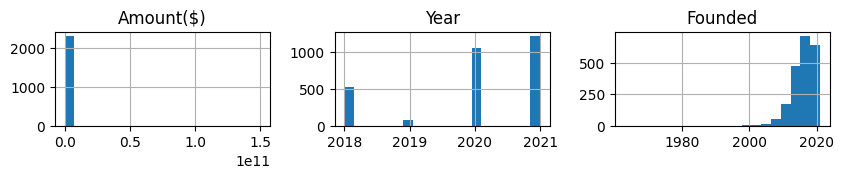

In [120]:
# Universal analysis
# Histogram for numeric variables

df.hist(
    figsize=(10,6),
    layout=(4,3),
    bins=20
    )

In [ ]:
df.info()

# Hypothesis Testing

***Null Hypothesis (H0):*** There is no difference in the amount of funding received by start-ups across different sectors.

***Alternative Hypothesis (H1):*** There is a difference in the amount of funding received by start-ups across different sectors.

In [ ]:
from scipy.stats import shapiro, levene

#  data
data = np.random.normal(loc=0, scale=1, size=100)

# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p = shapiro(data)
print("Shapiro-Wilk Test for Normality:")
print("Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p)



# Levene's Test for homogeneity of variances (example with 3 groups)
group1 = np.random.normal(loc=0, scale=1, size=50)
group2 = np.random.normal(loc=0.5, scale=1.5, size=50)
group3 = np.random.normal(loc=-0.5, scale=0.5, size=50)

levene_stat, levene_p = levene(group1, group2, group3)
print("Levene's Test for Homogeneity of Variances:")
print("Test Statistic:", levene_stat)
print("p-value:", levene_p)


*1.* Shapiro-Wilk Test for Normality: The test statistic calculated by the Shapiro-Wilk test measures the discrepancy between the observed data and what we would expect under the assumption of normality. A higher value indicates closer adherence to normality. The p-value is the probability associated with the test statistic. It indicates the likelihood of obtaining the observed data if the null hypothesis A higher p-value suggests weaker evidence against the null hypothesis.
In this case, the p-value (0.126) is greater than the chosen significance level (usually 0.05), indicating that the data is normally distributed.

*2.* Levene's Test for Homogeneity of Variances: Test Statistic: This is the test statistic calculated by Levene's test measures the discrepancy between the variances of the groups being compared. A higher value indicates greater variability between the group variances. The p-value is the probability associated with the test statistic. It indicates the likelihood of obtaining the observed data if the null hypothesis (all group variances are equal) were true. A lower p-value suggests stronger evidence against the null hypothesis.
Given these results:

If the assumption of normality holds (based on the Shapiro-Wilk test), and the assumption of homogeneity of variances is met (based on Levene's test), you can use ANOVA. If the assumption of normality is violated, or the assumption of homogeneity of variances is not met, you should use the Kruskal-Wallis H test, which is a non-parametric alternative to ANOVA. In this case, since the assumption of homogeneity of variances is violated (p-value < 0.05),

In [ ]:
from scipy.stats import kruskal



sector_groups = [df[df['Sector'] == sector]['Amount($)'] for sector in df['Sector'].unique()]


# Perform Kruskal-Wallis H-test
h_statistic, p_value = kruskal(*sector_groups)

# Print the results
print("Kruskal-Wallis H-test Results:")
print("H-statistic:", h_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a difference in funding amounts across different sectors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in funding amounts across different sectors.")

Based on the Kruskal-Wallis H-test results, we can conclude that there is indeed a difference in funding amounts across different sectors.

In [ ]:


# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the size of your plot as necessary
sns.boxplot(x='City', y='Amount($)', data=df)

plt.title('Distribution of Amount($) by City')
plt.show()


# Exploratory Data Analysis (EDA)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2879 non-null   object 
 2   Stage          2879 non-null   object 
 3   Amount($)      2312 non-null   float64
 4   City           2765 non-null   object 
 5   HeadQuarter    2765 non-null   object 
 6   What_it_does   2879 non-null   object 
 7   Year           2879 non-null   int64  
 8   Founded        2110 non-null   float64
 9   Founders       2289 non-null   object 
 10  Investor       1445 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 247.5+ KB


### Univariate Analysis

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()


In [ ]:
df.nunique().sum()


In [ ]:
df.sort_values(by='Amount($)', ascending=True).head()

In [ ]:
df.sort_values(by='Amount($)', ascending=False).head()

<Axes: >

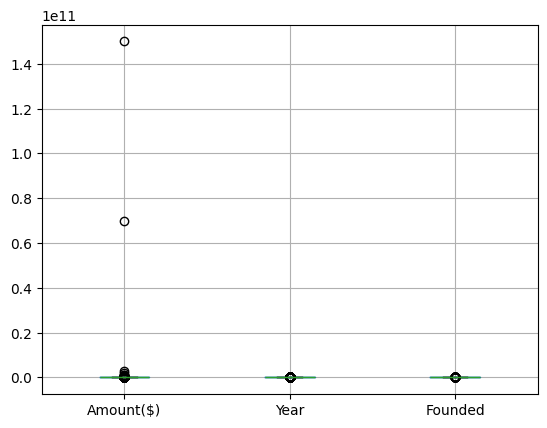

In [125]:
# Looking for outliers 
df.boxplot()

In [126]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_df.corr()
correlation

,Amount($),Year,Founded
Amount($),1.00,0.02,-0.02
Year,0.02,1.00,0.15
Founded,-0.02,0.15,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

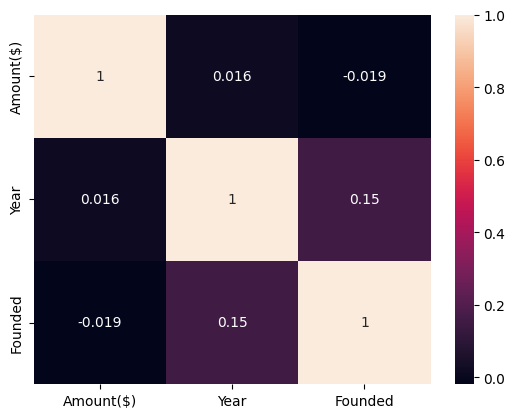

In [127]:
# This line of code creates a heatmap using seaborn (sns) of the 'correlation' matrix. 
sns.heatmap(correlation, annot=True)

plt.show

In [ ]:
df.select_dtypes(include=[np.number]).mean()


In [ ]:
df.select_dtypes(include='number')

**Distribution of Numeric Columns:**

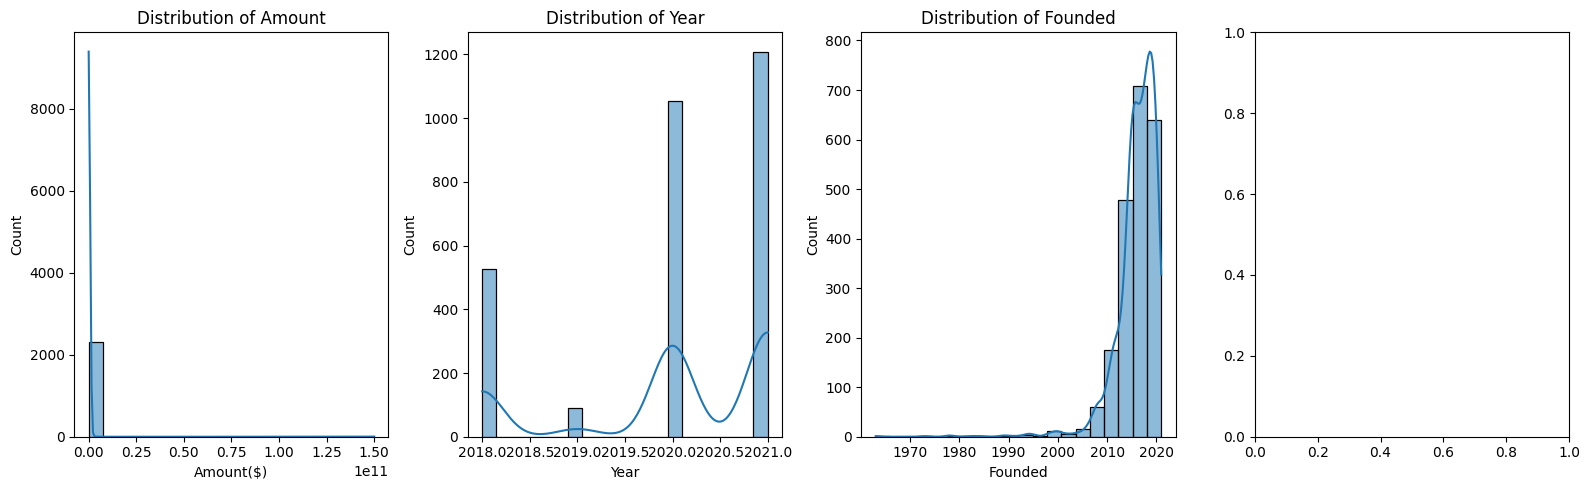

In [128]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Distribution of 'Amount' column
sns.histplot(df['Amount($)'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Distribution of 'Year' column
sns.histplot(df['Year'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Year')

# Distribution of 'Founded' column
sns.histplot(df['Founded'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Founded')

plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes(include='object')

**Distribution of Categorical Columns:**

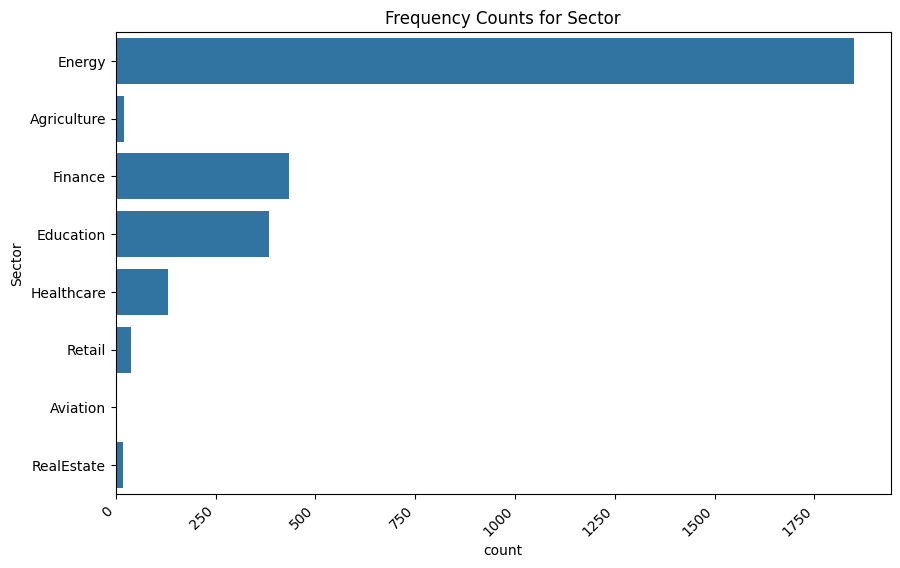

In [129]:
# Univariate analysis for categorical columns
categorical_columns = ['Sector']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[column])
    plt.title(f'Frequency Counts for {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
# Univariate analysis for categorical columns
categorical_columns = ['Stage', 'City']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column, order=df[column].value_counts().iloc[:20].index)
    plt.title(f'Top 20 Frequency Counts for {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

### Multivariate Analysis

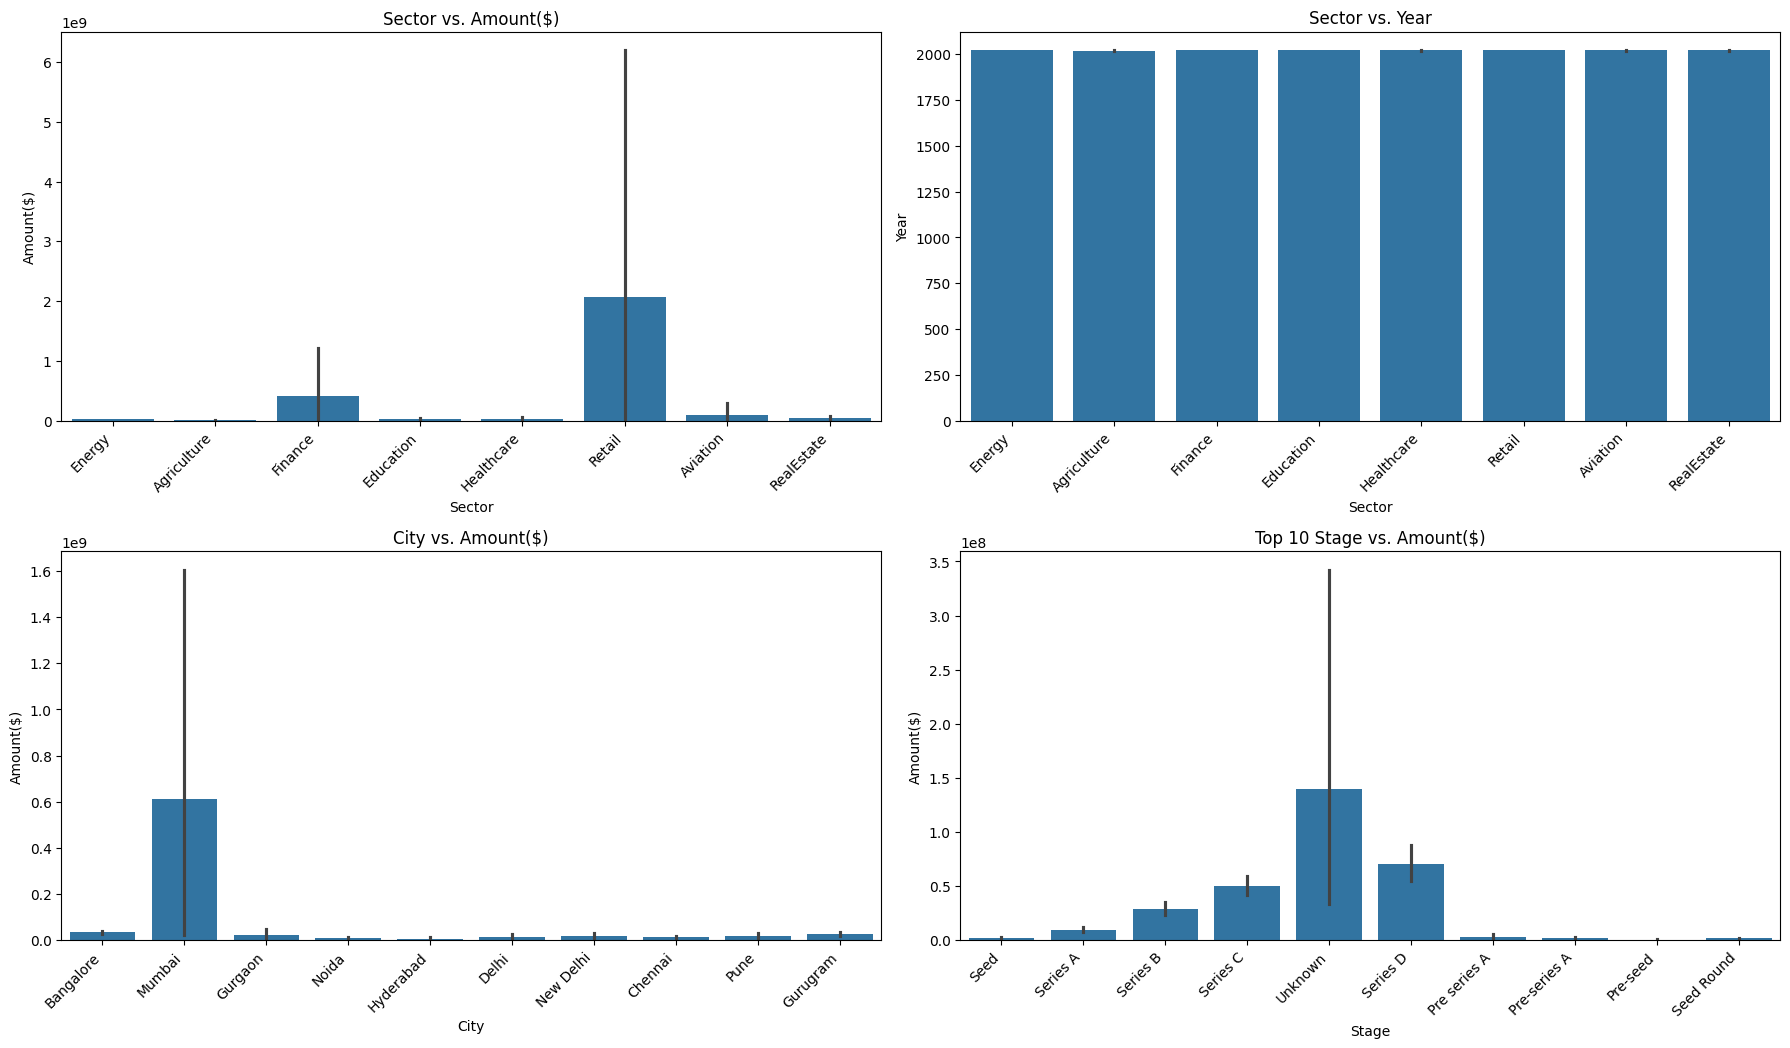

In [132]:

# Categorical vs. Numerical
plt.figure(figsize=(18, 20))

# Adjust vertical space between subplots
plt.subplots_adjust(hspace=0.5)

# Categorical: Main Sector vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 1)
top_10_main_sector = df['Sector'].value_counts().head(10).index
sns.barplot(x='Sector', y='Amount($)', data=df[df['Sector'].isin(top_10_main_sector)])
plt.title('Sector vs. Amount($)')
plt.xticks(rotation=45, ha='right')   

# Categorical: Main Sector vs. Numerical: Years of Existence (Column Chart)
plt.subplot(4, 2, 2)
sns.barplot(x='Sector', y='Year', data=df[df['Sector'].isin(top_10_main_sector)])
plt.title('Sector vs. Year')
plt.xticks(rotation=45, ha='right')

# Categorical: Industry vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 3)
top_10_industry = df['City'].value_counts().head(10).index
sns.barplot(x='City', y='Amount($)', data=df[df['City'].isin(top_10_industry)])
plt.title('City vs. Amount($)')
plt.xticks(rotation=45, ha='right')  

# Categorical: Top 10 Stage vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 4)
top_10_stage = df['Stage'].value_counts().head(10).index
sns.barplot(x='Stage', y='Amount($)', data=df[df['Stage'].isin(top_10_stage)])
plt.title('Top 10 Stage vs. Amount($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Numerical vs. Numerical**

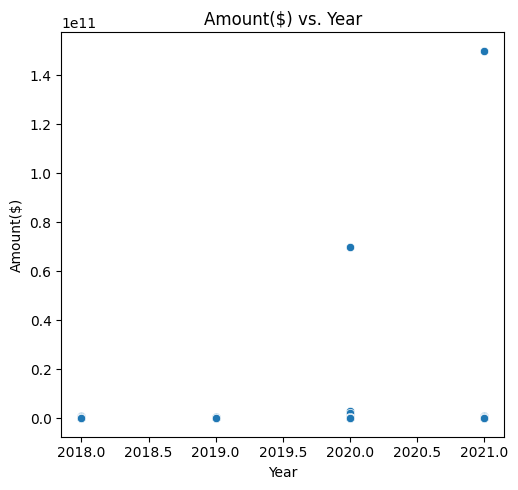

In [130]:
# Numerical vs. Numerical
plt.figure(figsize=(15, 5))

# Founded vs. Years of Existence
plt.subplot(1, 3, 3)
sns.scatterplot(x='Year', y='Amount($)', data=df)
plt.title('Amount($) vs. Year')

plt.tight_layout()
plt.show()

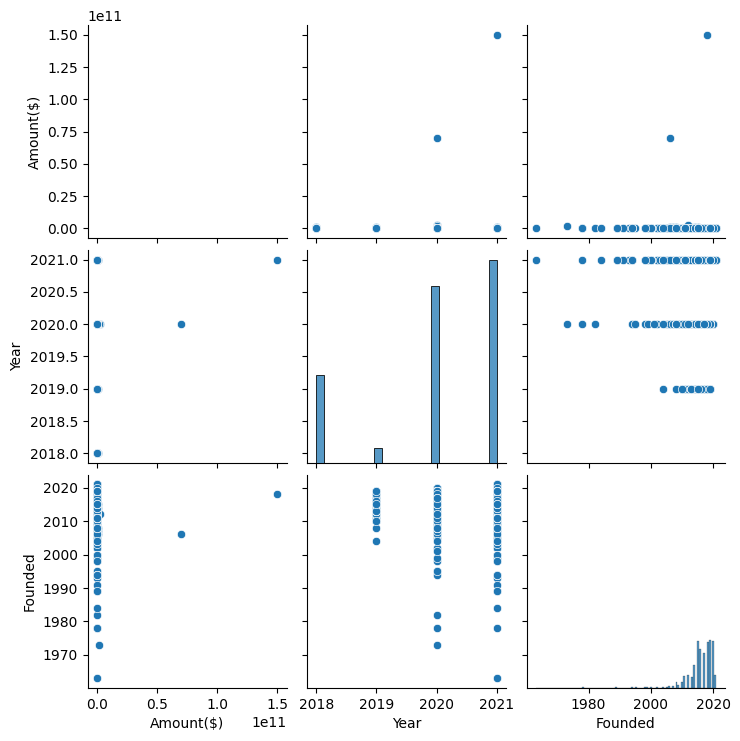

In [131]:
# Scatter Plots
# Create scatter plots for pairs of numeric variables
sns.pairplot(df[['Amount($)', 'Year', 'Founded']])
plt.show()

# Business Analysis Questions 

### ***Question 1*** - How has the funding trend for Indian start-ups changed from 2018 to 2021? 

In [ ]:
# Line plot showing funding trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Amount($)', data=df)
plt.title('Funding Trends for Indian Start-ups by Sector (2018-2021)')
plt.xlabel('Founding Year')
plt.ylabel('Amount (in USD)')
plt.show()

In [ ]:

# Group the data by year and calculate the total funding amount for each year
funding_trend = df.groupby('Year')['Amount($)'].sum().reset_index()

# Plotting the funding trend over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Amount($)', data=funding_trend, marker='o', color='b')
plt.title('Funding Trends for Indian Start-ups (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ***Question 2*** - Which sectors or industries received the most funding? 

In [ ]:
# Sort the DataFrame by the total funding amount for each industry in descending order
industry_total_funding = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(y='Amount($)', x='Sector', data=industry_total_funding)
plt.title('Total Funding by Industry')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

### ***Question 3*** - Who are the major investors in the Indian start-up ecosystem?

In [ ]:
# Plotting the frequency of investments by investor
plt.figure(figsize=(12, 8))
sns.countplot(y='Investor', data=df, order=df['Investor'].value_counts().index[:10], palette='muted')
plt.title('Frequency of Investments by Major Investors (Top 10)')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.xticks(rotation=45)
plt.show()

### ***Question 4*** - Are there any specific cities in India that are attracting more start-ups than the others?

In [ ]:

# Plotting the frequency of start-ups by city or region
plt.figure(figsize=(12, 8))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10], palette='muted')
plt.title('Frequency of Start-ups by City (Top 10)')
plt.xlabel('Number of Start-ups')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

### ***Question 5*** - Which cities in India have attracted the most funding?

In [ ]:
# Group the data by city or region and calculate the total funding amount for each
funding_by_city = df.groupby('City')['Amount($)'].sum().reset_index()

# Sort the data in descending order based on total funding amount
funding_by_city_sorted = funding_by_city.sort_values(by='Amount($)', ascending=False)

# Plotting the total funding amount by city or region
plt.figure(figsize=(12, 8))
sns.barplot(x='Amount($)', y='City', data=funding_by_city_sorted[:10], palette='viridis')
plt.title('Total Funding by City (Top 10)')
plt.xlabel('Total Funding Amount (in USD)')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

### ***Question 6*** - Which start-ups have shown the most growth in terms of funding received over the years?

In [ ]:

# Grouping the data by year and industry and counting the number of investments
investment_counts = df.groupby(['Year', 'Sector']).size().reset_index(name='Investment Count')

# Calculating the percentage change in investment counts between consecutive years for each industry
investment_counts['Percentage Change'] = investment_counts.groupby('Sector')['Investment Count'].pct_change()

# Filtering out the rows with NaN percentage change (due to no data for the previous year)
investment_counts = investment_counts.dropna()

# Getting the top 3 emerging sectors with the highest percentage change
top_emerging_sectors = investment_counts.groupby('Sector')['Percentage Change'].mean().nlargest(5).index.tolist()

# Filtering the data for the top 3 emerging sectors
emerging_sectors_data = investment_counts[investment_counts['Sector'].isin(top_emerging_sectors)]

# Plotting the investment counts over time for the top 3 emerging sectors
plt.figure(figsize=(12, 8))
sns.lineplot(data=emerging_sectors_data, x='Year', y='Investment Count', hue='Sector', marker='o')
plt.title('Investment Trends in Top 5 Emerging Sectors')
plt.xlabel('Year')
plt.ylabel('Investment Count')
plt.legend(title='Sector')
plt.grid(True)


plt.show()